In [145]:
# 1. Create a dataframe of passes which contains all the passes in the match
# 2. Plot the start point of every Sweden pass. Attacking left to right.
# 3. Plot only passes made by Caroline Seger (she is Sara Caroline Seger in the database)
# 4. Plot arrows to show where the passes went to.

In [146]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
from mplsoccer import Pitch, FontManager, Sbopen

rcParams['text.color'] = '#c7d5cc'  # set the default text color

In [147]:
parser = Sbopen()
df, related, freeze, tactics = parser.event(15946)
# From the "team_name" column, find the unique values of home team (team1), and away team (team2)
team1, team2 = df.team_name.unique()
mask_team1 = (df.type_name == 'Pass') & (df.team_name == team1)

In [152]:
passes = df.loc[mask_team1, ['team_name', 'player_name', 'type_name', 'x', 'y', 'end_x', 'end_y', 'outcome_name']]
mask_complete = passes.outcome_name.isnull()

In [ ]:
# Single player 

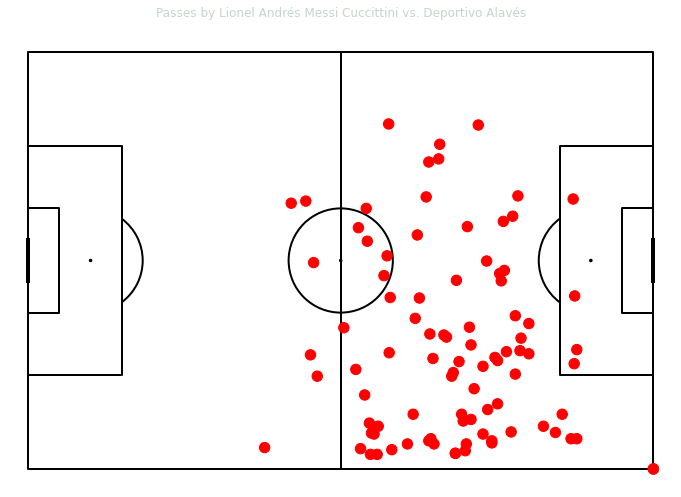

In [149]:
player_passes = 'Lionel Andrés Messi Cuccittini'
# Create the pitch with the help from mplsoccer
pitch = Pitch(line_color = 'black')
fig, ax = pitch.draw(figsize=(16, 11))
# size of the pitch - displayed in yards
pitchLengthX = 120
pitchWidthY = 80
# Plot the passes
for i, p in passes.iterrows():
    x = p['x']
    y = p['y']
    team_name = p['team_name'] == team1
    player = p['player_name'] == player_passes
    circleSize = 1
    if team_name:
        if player:
            passCircle = plt.Circle((x,y), circleSize, color = 'red')
            ax.add_patch(passCircle)

fig.suptitle(f'Passes by {player_passes} vs. {team2}')
fig.set_size_inches(10,7)
plt.show()

# Passing arrows

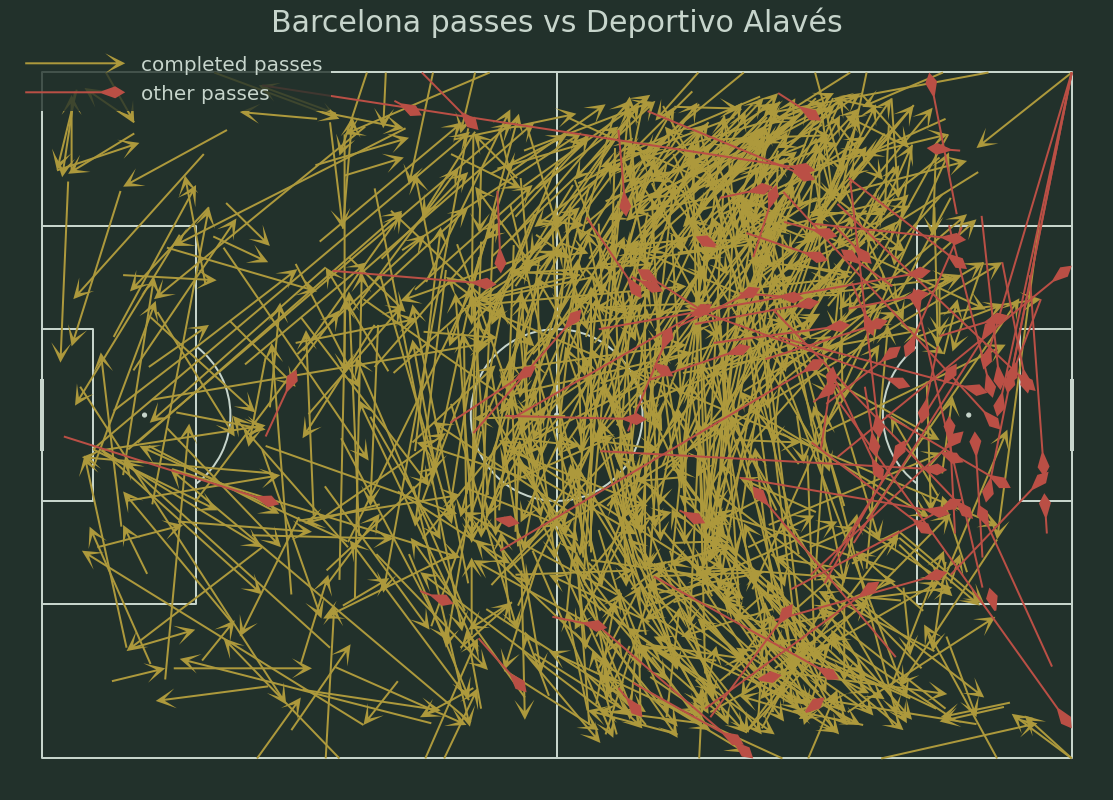

In [150]:
# player_passes = 'Lionel Andrés Messi Cuccittini'
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')

# Plot the completed passes
pitch.arrows(passes[mask_complete].x, passes[mask_complete].y,
             passes[mask_complete].end_x, passes[mask_complete].end_y, width=2,
             headwidth=10, headlength=10, color='#ad993c', ax=ax, label='completed passes')

# Plot the other passes
pitch.arrows(passes[~mask_complete].x, passes[~mask_complete].y,
             passes[~mask_complete].end_x, passes[~mask_complete].end_y, width=2,
             headwidth=6, headlength=5, headaxislength=12,
             color='#ba4f45', ax=ax, label='other passes')

# Set up the legend
ax.legend(facecolor='#22312b', handlelength=5, edgecolor='None', fontsize=20, loc='upper left')

# Set the title
ax_title = ax.set_title(f'{team1} passes vs {team2}', fontsize=30)